# <center> <div class="alert alert-block alert-info"> <span style="color:crimson;"> Delhi House Price Prediction </center>

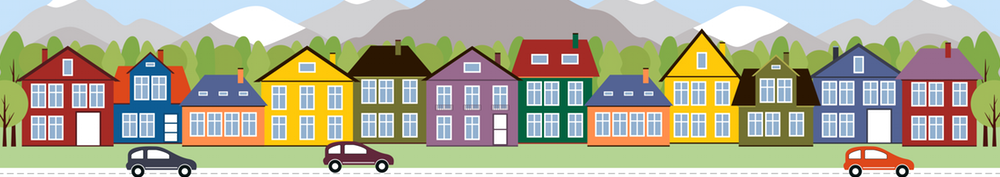

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
df = pd.read_csv("/kaggle/input/pune-house-data/Delhi house data.csv")
df.head(n = 5)

**Statistical Insights**

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

# Data Cleaning

In [ ]:
df.isnull().sum()

In [ ]:
duplicate = df[df.duplicated()]
duplicate

In [ ]:
df1 = df.drop_duplicates().reset_index(drop=True)
df1.shape

In [ ]:
df1.isnull().sum()

In [ ]:
df1['Per_Sqft'] = df1['Per_Sqft'].fillna(df1['Per_Sqft'].mean())
df1['Parking'] = df1['Parking'].fillna(df1['Parking'].mode()[0])

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isnull().sum()

In [ ]:
df1.shape

# Data Visualize

In [ ]:
px.histogram(df1,x='Price', color = 'Type')

In [ ]:
px.histogram(df1,x='BHK')

In [ ]:
px.histogram(df1,x='Area',barmode='relative')

In [ ]:
px.histogram(df1,x='Price')

In [ ]:
px.histogram(df1,x='Parking')

In [ ]:
px.histogram(df1,x='Bathroom')

In [ ]:
px.histogram(df1,x='Furnishing')

In [ ]:
px.histogram(df1,x='Status')

In [ ]:
px.histogram(df1,x='Transaction')

In [ ]:
px.histogram(df1,x='Type')

In [ ]:
df1['Furnishing'].value_counts()

In [ ]:
df1['Status'].value_counts()

In [ ]:
df1['Transaction'].value_counts()

In [ ]:
df1['Type'].value_counts()

In [ ]:
df1['Locality'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Furnishing','Status','Transaction','Type','Locality']
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
df1.head(n=5)

In [ ]:
px.scatter(df1,x='Price',y='Area',color='Locality',size='BHK',hover_data=['Per_Sqft','Type','Status'])

In [ ]:
px.box(df1,points='all')

In [ ]:
px.violin(df1,x='Price',box=True,points='all')

# Removing Outliers

In [ ]:
zscore = np.abs(stats.zscore(df1))
print(zscore)

In [ ]:
print(np.where(zscore > 5))

In [ ]:
df1 = df1[(zscore<5).all(axis=1)]

In [ ]:
df1.shape

In [ ]:
df1.corr()

In [ ]:
px.imshow(df1.corr())

# <center> <div class="alert alert-block alert-info"> <span style="color:crimson;"> Data Preprocessing </center>

In [ ]:
x = df1.drop('Price',axis=True)
y = df1['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

# <center> <div class="alert alert-block alert-info"> <span style="color:crimson;"> Models </center>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

**KNeighborsRegressor**

In [ ]:
k_reg = KNeighborsRegressor()
k_reg.fit(x_train,y_train)

k_acc = r2_score(y_test,k_reg.predict(x_test))

print("Train accuracy:", (k_reg.score(x_train,y_train)))
print("Test accuracy:", (k_reg.score(x_test,y_test)))

**LinearRegression**

In [ ]:
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)

l_acc = r2_score(y_test,l_reg.predict(x_test))

print("Train accuracy:", (l_reg.score(x_train,y_train)))
print("Test accuracy:", (l_reg.score(x_test,y_test)))

**DecisionTreeRegressor**

In [ ]:
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train,y_train)

d_acc = r2_score(y_test,d_reg.predict(x_test))

print("Train accuracy:", (d_reg.score(x_train,y_train)))
print("Test accuracy:", (d_reg.score(x_test,y_test)))

**RandomForestRegressor**

In [ ]:
r_reg = RandomForestRegressor()
r_reg.fit(x_train,y_train)

r_acc = r2_score(y_test,r_reg.predict(x_test))

print("Training accuracy:",(r_reg.score(x_train,y_train)))
print("Test accuracy:",(r_reg.score(x_test,y_test)))

**XGBRegressor**

In [ ]:
x_reg = XGBRegressor()
x_reg.fit(x_train,y_train)

x_acc = r2_score(y_test,x_reg.predict(x_test))

print("Training accuracy:",(x_reg.score(x_train,y_train)))
print("Test accuracy:",(x_reg.score(x_test,y_test)))

**BaggingRegressor**

In [ ]:
B_reg = BaggingRegressor()
B_reg.fit(x_train,y_train)

B_acc = r2_score(y_test,B_reg.predict(x_test))

print("Training accuracy:",(B_reg.score(x_train,y_train)))
print("Test accuracy:",(B_reg.score(x_test,y_test)))

**GradientBoostingRegressor**

In [ ]:
GB_reg = GradientBoostingRegressor()
GB_reg.fit(x_train,y_train)

GB_acc = r2_score(y_test,GB_reg.predict(x_test))

print("Training accuracy:",(GB_reg.score(x_train,y_train)))
print("Test accuracy:",(GB_reg.score(x_test,y_test)))

In [ ]:
models = pd.DataFrame({
    'Models': ['Knn','Linear','DecisionTree','RandomForest','XGB','Bagging','GradientBoosting'],
    'Scores': [k_acc,l_acc,d_acc,r_acc,x_acc,B_acc,GB_acc]

})

models.sort_values(by = 'Scores',ascending = False)

In [ ]:
px.bar(models,x='Models',y = 'Scores',color='Models')

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.histplot(y_test, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
sns.histplot(x_reg.predict(x_test), color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()